# CSE 6367 Programming Assignment 1 (P1)
# Spring 2024
## Due: 11:59pm Central Time, Friday, February 9, 2023

### Task 1 (20 points)

Import the "colors.png" image

<img src = "colors.png" style="width:314px;height:316px">

a) Display the Red, Green and Blue color channels separately in a 1X3 plot.

b) Apply a mask on the original image based on pixel intensity values where red pixel values are in the range (100-255) and blue and green pixel values are in the range (0-50) and show the masked image.

c) Convert the original image to grayscale using the formula, grayscale = ((Red + Green + Blue) / 3) and display the image.

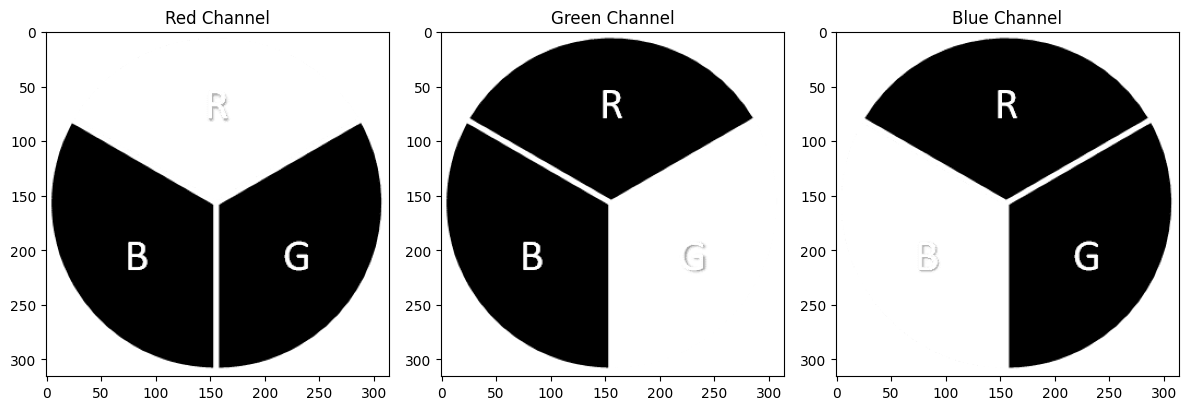

In [ ]:
import cv2 as cv
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('colors.png')
imgRGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)


plt.figure(figsize=[12,4])

plt.subplot(1,3,1);

#Red
plt.imshow(imgRGB[:,:,0], cmap= "gray")
plt.title("Red Channel")

#Green
plt.subplot(1,3,2);
plt.imshow(imgRGB[:,:,1], cmap= "gray")
plt.title("Green Channel")

#Blue
plt.subplot(1,3,3);
plt.imshow(imgRGB[:,:,2], cmap= "gray")
plt.title("Blue Channel")


plt.tight_layout()

plt.show()



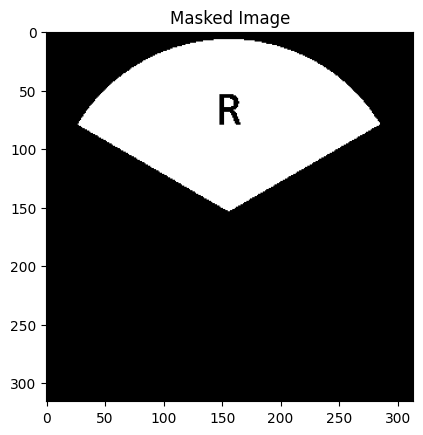

In [ ]:
#Task b:)
mask = np.zeros_like(imgRGB)
#plt.imshow(mask1)
#red pixel values are in the range (100-255)
#and blue and green pixel values are in the range (0-50)
mask = cv.inRange(imgRGB, (100,0,0), (255,50,50))
plt.imshow(mask, cmap = "gray");
plt.title("Masked Image");

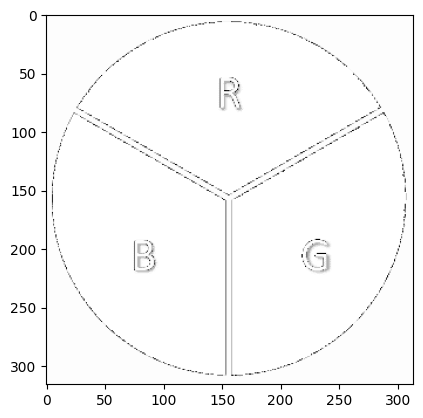

In [ ]:
#Task c:)
blue = imgRGB[:,:,0]
green = imgRGB[:,:,1]
red = imgRGB[:,:,2]
grayscale_img = (blue+green+red)/3
grayscale_img = np.clip(grayscale_img,0,255)
plt.imshow(grayscale_img,cmap ="gray")

### Task 2 (20 points)

a) Import the "apple.jpg" image

<img src = "apple.jpg" style="width:400px;height:250px">

We'd like to extract the green apple from the image above. Apply a suitable mask to extract the green apple from the RGB image. Then, covert the image to HSV space and apply a suitable Hue range to extract the green apple.  

Display the original image, the masked image in RGB space and the masked image in HSV color space in a 1X3 plot.


b) Import the "stop-sign.jpg" image

<img src = "Images/stop-sign.jpg" style="width:500px;height:333px">

We'd like to extract the red stop sign from the image above. Apply a suitable mask to extract the stop sign in RGB color space. Then, covert the image to HSV space and apply a suitable Hue range to extract the stop sign.  

Display the original image, the masked image in RGB space and the masked image in HSV color space in a 1X3 plot.

Text(0.5, 1.0, 'HSV Image')

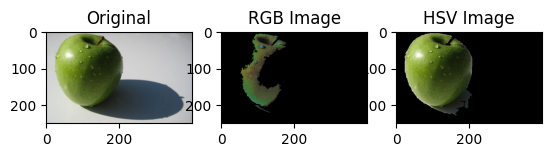

In [ ]:
import cv2
import numpy as np

apple = cv2.imread( "apple.jpg")

rgb_apple = cv2.cvtColor(apple, cv2.COLOR_BGR2RGB)
green_low = np.array([0, 75, 0])
green_high = np.array([130, 255, 130])
green_mask = cv2.inRange(rgb_apple, green_low, green_high)
kernel = np.ones((3, 3), np.uint8)
greenrgb_mask = cv2.erode(green_mask, kernel, iterations=1)
greenrgb_mask = cv2.dilate(green_mask, kernel, iterations=1)

contours, _ = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

largest_contour_area = 0
largest_contour_index = -1
for index, contour in enumerate(contours):
    current_area = cv2.contourArea(contour)
    if current_area > largest_contour_area:
        largest_contour_area = current_area
        largest_contour_index = index

    green_mask.fill(0)
    if largest_contour_index != -1:
        cv2.drawContours(green_mask, contours, largest_contour_index, (255), -1)

segmentedrgb_image = cv2.bitwise_and(apple, apple, mask=green_mask)


hsv_apple = cv2.cvtColor(apple, cv2.COLOR_BGR2HSV)
green_low = np.array([30, 30, 0])
green_high = np.array([80, 255, 255])
green_mask = cv2.inRange(hsv_apple, green_low, green_high)
kernel = np.ones((3, 3), np.uint8)
green_mask = cv2.erode(green_mask, kernel, iterations=1)
green_mask = cv2.dilate(green_mask, kernel, iterations=1)

contours, _ = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

largest_contour_area = 0
largest_contour_index = -1
for index, contour in enumerate(contours):
    current_area = cv2.contourArea(contour)
    if current_area > largest_contour_area:
        largest_contour_area = current_area
        largest_contour_index = index

    green_mask.fill(0)
    if largest_contour_index != -1:
        cv2.drawContours(green_mask, contours, largest_contour_index, (255), -1)

segmentedhsv_image = cv2.bitwise_and(apple, apple, mask=green_mask)

plt.subplot(1,3,1)
plt.imshow(rgb_apple)
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(segmentedrgb_image, cv2.COLOR_HSV2RGB))
plt.title('RGB Image')
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(segmentedhsv_image, cv2.COLOR_BGR2RGB))
plt.title('HSV Image')


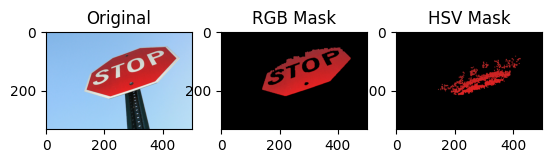

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('stop-sign.jpg')

rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

lower_red = np.array([150, 0, 0])
upper_red = np.array([255, 80, 80])


mask_rgb = cv2.inRange(rgb, lower_red, upper_red)


kernel = np.ones((5,5), np.uint8)
mask_rgb = cv2.morphologyEx(mask_rgb, cv2.MORPH_OPEN, kernel)


segmented_rgb = cv2.bitwise_and(rgb, rgb, mask=mask_rgb)


hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


lower_red = np.array([0, 50, 50])
upper_red = np.array([50, 255, 255])

mask_hsv = cv2.inRange(hsv, lower_red, upper_red)

kernel = np.ones((3,3), np.uint8)
mask_hsv = cv2.morphologyEx(mask_hsv, cv2.MORPH_OPEN, kernel)

segmented_hsv = cv2.bitwise_and(hsv, hsv, mask=mask_hsv)

plt.subplot(131)
plt.title('Original')
plt.imshow(rgb)

plt.subplot(132)
plt.title('RGB Mask')
plt.imshow(segmented_rgb)

plt.subplot(133)
plt.title('HSV Mask')
plt.imshow(cv2.cvtColor(segmented_hsv, cv2.COLOR_HSV2RGB))

plt.show()

### Task 3 (20 points)

Import the "cameraman.jpeg" image and apply different geometric transformations to it.
<img src = "Images/cameraman.jpeg" style="width:487px;height:487px">

a) Shift the original image 100 pixels left and 50 pixels down and display the translated image.

b) Rotate the image counter-clockwise by 45 degree and display the result.

c) Flip the image vertically and horizontally and display the results in a 1X2 plot.

d) Crop the head part of the cameraman and display it. (no specific crop requirement, any reasonable crop of the head will be considered correct)

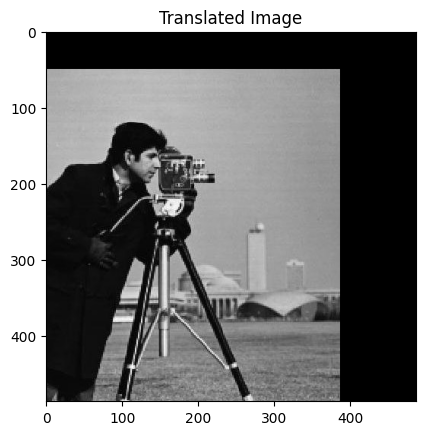

In [ ]:
img = cv.imread('cameraman.jpeg')
imgRGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)

rows,cols,ch = imgRGB.shape

#a)

M = np.float32([[1,0,-100],[0,1,50]])
dst = cv.warpAffine(img,M,(cols,rows))
plt.imshow(dst)
plt.title("Translated Image");



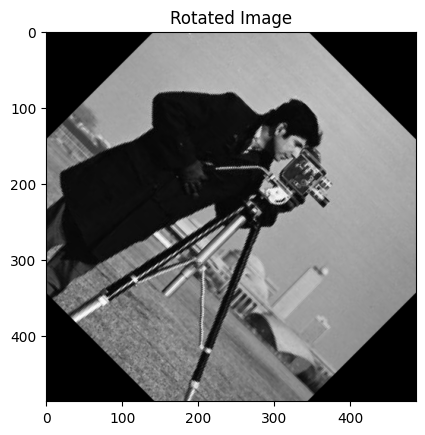

In [ ]:
#b:)

# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),-45,1)
dst = cv.warpAffine(img,M,(cols,rows))
plt.imshow(dst)
plt.title("Rotated Image");

Text(0.5, 1.0, 'Fliiped  vertically and horizontally image')

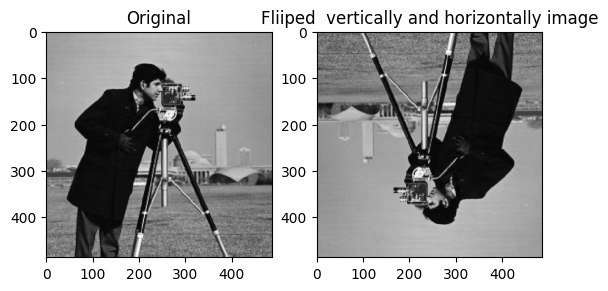

In [ ]:
#c:)Flip the image vertically and horizontally and display the results in a 1X2 plot.
M = cv.flip(imgRGB, -1)

plt.subplot(1,2,1)
plt.imshow(imgRGB)
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(M)
plt.title("Fliiped  vertically and horizontally image")


Text(0.5, 1.0, 'Horizontal Flip')

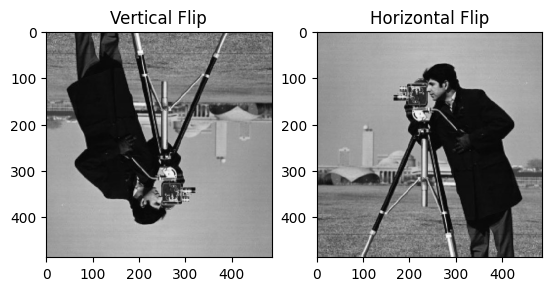

In [ ]:
plt.subplot(1,2,1)
image = cv2.flip(imgRGB, 0)
plt.imshow(image)
plt.title('Vertical Flip')
plt.subplot(1,2,2)
image = cv2.flip(imgRGB, 1)
plt.imshow(image)
plt.title('Horizontal Flip')

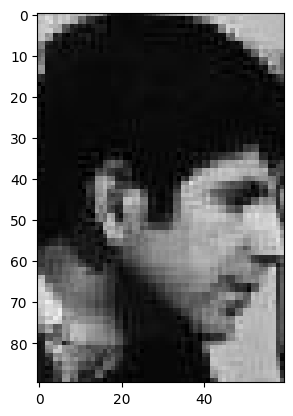

In [ ]:
#d:)
crop = imgRGB[70:160,190:250]
plt.imshow(crop)

### Task 4 (20 points)

Import the "dog.jpg" image and apply the following point processing to it.
<img src = "Images/dog.jpg" style="width:400px;height:400px">

a) Create a darker image by subtracting 128 from each pixel intensity value.

b) Create a low contrast image by diving each pixel intensity value by 2.

c) Invert the original image where the pixel values are updated as 255 - current pixel intensity value.

d) Create a brighter image by adding 128 to each pixel intensity value.

e) Create a high contrast image by multiplying each pixel intensity value by 2.

Display all of these images along with the original image in a 2X3 grid.

In [ ]:
#a:)
img = cv.imread('dog.jpg')
imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
#plt.imshow(imgRGB)
imgRGB1 = imgRGB.copy()
imgRGB = imgRGB.astype(np.float32)

In [ ]:
#a)
darker = imgRGB - 128
darker[darker < 0] = 0
darker = np.clip(darker,0,255)
#print(darker.dtype)
darker = darker.astype(np.uint8)
#plt.imshow(darker)

In [ ]:
#b:)
low_contrast = imgRGB//2
low_contrast = np.clip(low_contrast,0,255)
low_contrast = low_contrast.astype(np.uint8)
#plt.imshow(low_contrast)

In [ ]:
#c:)
invert = 255- imgRGB
invert = np.clip(invert, 0, 255)
invert = invert.astype(np.uint8)
#plt.imshow(invert)

In [ ]:
#d:)

bright = imgRGB + 128
bright[bright > 255] = 255
bright = bright.astype(np.uint8)

#plt.imshow(bright)

In [ ]:
#e:)
highcontrast = imgRGB * 2
highcontrast = np.clip(highcontrast,0,255)
highcontrast = highcontrast.astype(np.uint8)
#plt.imshow(highcontrast)

Text(0.5, 1.0, 'High Contrast')

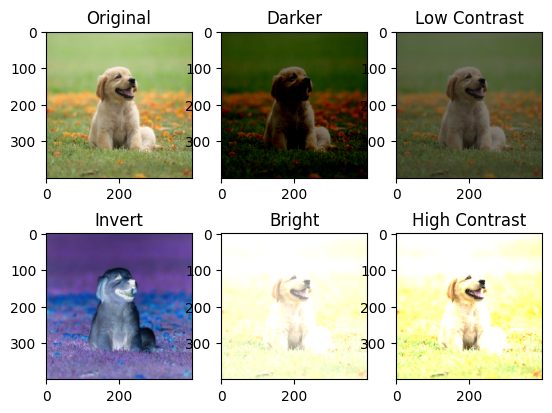

In [ ]:
fig, axs = plt.subplots(2, 3)
axs[0, 0].imshow(imgRGB1)
axs[0, 0].set_title("Original")
axs[0, 1].imshow(darker)
axs[0, 1].set_title("Darker")
axs[0, 2].imshow(low_contrast)
axs[0, 2].set_title("Low Contrast")
axs[1, 0].imshow(invert)
axs[1,0].set_title("Invert")
axs[1, 1].imshow(bright)
axs[1,1].set_title("Bright")
axs[1,2].imshow(highcontrast)
axs[1,2].set_title("High Contrast")

### Task 5 (20 points)

Import the "cameraman.jpeg" image
<img src = "Images/cameraman.jpeg" style="width:487px;height:487px">

a) Perform average blur with kernel size 9X9 and 25X25. Display the original image with the filtered/processed images in a 1X3 grid.


b) Perform gaussian blur with kernel size 9X9, sigma (standard deviation of the Gaussian) of 2.0 and another gaussian blur with kernel size 25X25, sigma 15. Display the original image with the filtered/processed images in a 1X3 grid.


c) Perform median blur with kernel size 5X5 and 15X15. Display the original image with the filtered/processed images in a 1X3 grid.


d) Resize the guassian blurred image with kernel size 25X25 and sigma 15 to 40X40 pixels, and resize the original image to 40X40 pixels. Display the original image with the filtered/processed images in a 1X3 grid.


Note: Apply zero-padding to make the filtered image size same as original image.

In [ ]:
img = cv.imread('cameraman.jpeg')
imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)

(487, 487, 3)
(487, 487, 3)


Text(0.5, 1.0, '25*25 Blue')

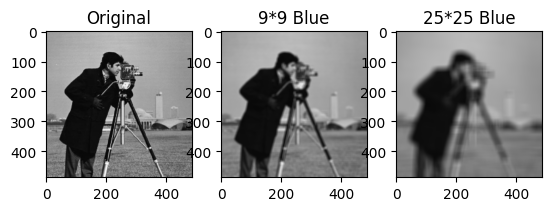

In [ ]:
blur99_img = cv.blur(imgRGB,ksize= (9,9))
print(blur99_img.shape)
blur2525_img = cv.blur(imgRGB,ksize= (25,25))
print(blur2525_img.shape)
fig, axs = plt.subplots(1, 3)

axs[0].imshow(imgRGB)
axs[0].set_title('Original')
axs[1].imshow(blur99_img)
axs[1].set_title('9*9 Blue')
axs[2].imshow(blur2525_img)
axs[2].set_title('25*25 Blue')

Text(0.5, 1.0, '25*25 Blue')

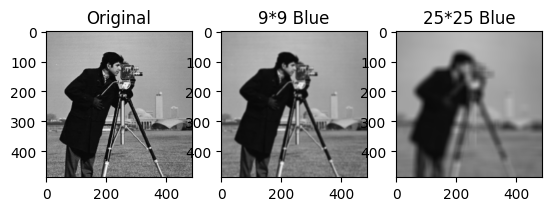

In [ ]:
#b)
Gaussian_99 = cv.GaussianBlur(imgRGB,(9,9),2)
Gaussian_2525 = cv.GaussianBlur(imgRGB,(25,25),15)

fig, axs = plt.subplots(1, 3)
axs[0].imshow(imgRGB)
axs[0].set_title('Original')
axs[1].imshow(Gaussian_99)
axs[1].set_title('9*9 Blue')
axs[2].imshow(Gaussian_2525)
axs[2].set_title('25*25 Blue')

Text(0.5, 1.0, 'Kernel=15 Median Blur')

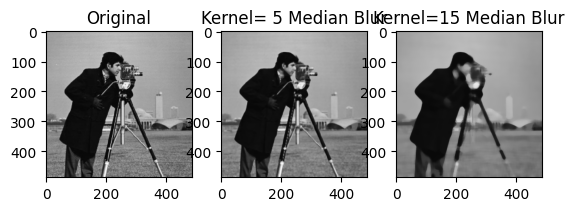

In [ ]:
#c)
Gaussian_55 = cv.medianBlur(imgRGB,5)
Gaussian_1515 = cv.medianBlur(imgRGB,15)

fig, axs = plt.subplots(1, 3)
axs[0].imshow(imgRGB)
axs[0].set_title('Original')
axs[1].imshow(Gaussian_55)
axs[1].set_title('Kernel= 5 Median Blur')
axs[2].imshow(Gaussian_1515)
axs[2].set_title('Kernel=15 Median Blur')


Text(0.5, 1.0, 'Original Reduced')

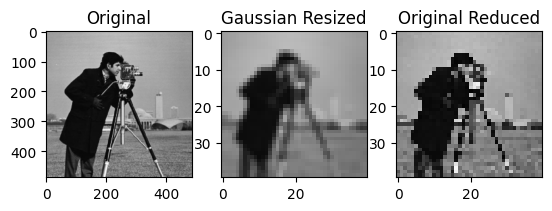

In [ ]:
#d:)Resize the guassian blurred image with kernel size 25X25 and sigma 15 to 40X40 pixels,
#and resize the original image to 40X40 pixels. Display the original image with the filtered/processed images in a 1X3 grid.

Gaussian_2525_resized = cv.resize(Gaussian_2525, dsize = (40,40))
img_resized = cv.resize(imgRGB, dsize = (40,40))

fig, axs = plt.subplots(1, 3)
axs[0].imshow(imgRGB)
axs[0].set_title('Original')
axs[1].imshow(Gaussian_2525_resized)
axs[1].set_title('Gaussian Resized')
axs[2].imshow(img_resized)
axs[2].set_title('Original Reduced')


References:


1.  https://realpython.com/python-opencv-color-spaces/
2.  https://www.geeksforgeeks.org/python-remove-part-of-an-image/
3.  https://www.learningaboutelectronics.com/ArticlesHow-to-find-the-largest-or-smallest-object-in-an-image-Python-OpenCV.php

## Submission Guidelines:

1. Submit through Canvas your source code in a single .ipynb file. The name of the .ipynb file should be YourStudentID.ipynb. (For example: 1001234567.ipynb)

2. Import all the images from the ./Images directory. Your TA will use the same directory name to grade your submission.

3. You don't need to attach the image file with your submission.
